In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# kMeans clustering

* <font color='green'>**Clustering**</font>: is the task of partitioning the dataset into groups
* Finds clusters of samples (rows)
* Number of clusters must be specified
* kMeans() tries to find cluster centers that are representative of certain regions of the data
* The algorithm assigns a new datapoint to the closest cluster center and recalculates its center position based on the mean of the points that are already signed to it.
* Algorithm knows it's finished when the assignment of instances to clusters no more changes.

![](img/kmeans.png)

* Next image shows the borders kmeans came about (from mglearn)

![](img/kmeans2.png)

#### kMeans on Iris dataset:

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# kmeans object
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train, y_train)

y_pred = kmeans.predict(X_test)
# predicted labels vs real labels
print("Predicted labels:\n{}".format(y_pred))
print("\nReal labels:\n{}".format(y_test))

Predicted labels:
[2 2 1 2 2 1 0 2 1 2 0 2 1 0 1 2 0 0 1 1 2 0 2 2 0 2 2 2 2 0 2 2 1 0 2 1 1
 1]

Real labels:
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2 2 1 0 2 1 0 0
 0]


#### Plotting real vs predicted labels on sepal length and petal length

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
kmeans.cluster_centers_

array([[6.85172414, 3.07241379, 5.80689655, 2.10344828],
       [5.00769231, 3.41794872, 1.47692308, 0.25128205],
       [5.92045455, 2.71136364, 4.35454545, 1.40681818]])

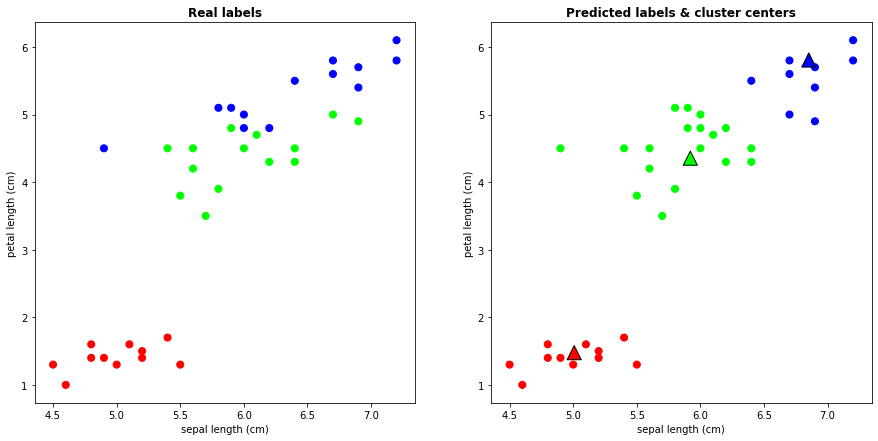

In [5]:
#define colormap
cmap_rgb = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_rgb2 = ListedColormap(['#0000FF','#FF0000','#00FF00'])

# real labels
plt.figure(figsize=(15,7))
plt.set_cmap('viridis')
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:,2], c=y_test, s=50, cmap=cmap_rgb)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('Real labels', weight='bold')

# predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:,2], c=y_pred, s=50, cmap=cmap_rgb2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('Predicted labels & cluster centers', weight='bold')

# cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,2], marker='^', s=200, 
            c=np.unique(y_pred), edgecolor='black', cmap=cmap_rgb2)
plt.show()

## Estimating Number of Clusters

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the **inertia** or within-cluster sum-of-squares. 
* The k-means algorithm divides a set of $N$ samples $X$ into disjoint clusters $C$, each described by the mean/centroid $\mu_j$ of the samples in the cluster.
* The K-means algorithm aims to choose centroids that minimise the **inertia**, or within-cluster sum of squared criterion:

$$\sum \text{min}(||x_i - \mu_j||^2 ) $$

In [6]:
# sample dataset
grain = pd.read_csv('data/seeds.csv', header=None)
grain.head(2)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


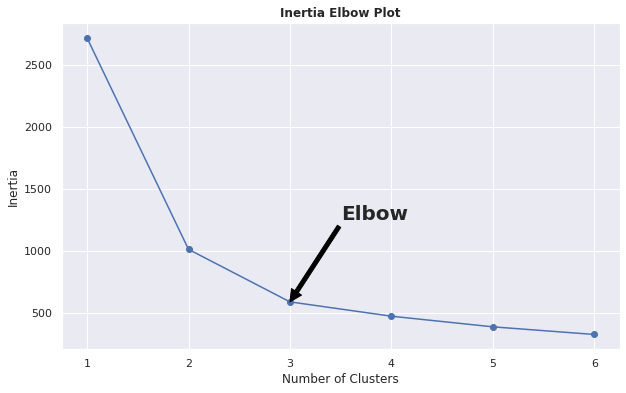

In [7]:
# samples, excluidng last column
grain_samples = grain.iloc[:,:-1].values

# range [1-6]
n_clusters = np.arange(1, 7)

# measure each models inertia
inertias = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n).fit(grain_samples)
    inertias.append(kmeans.inertia_)

# ploting the inertias
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Elbow Plot', weight='bold')
plt.annotate(s="Elbow", xytext=(3.5, 1250),
             xy=(3, inertias[2]), arrowprops={'color': 'black'}, weight='bold', fontsize=20)
plt.show()

- A good clustering has tight clusters (so low inertia) ... but not too many clusters!
- Choose an "elbow" in the inertia plot, where inertia begins to decrease more slowly
- Since the slope doesn't change much after k=3, it seems this dataset can be clustered into 3 groups.

In [8]:
# confirm the number of clusters for grain dataset
print("Unique Target Values: {}".format(grain[7].unique()))

Unique Target Values: [1 2 3]


## Cross Tabulation

Let's use cross-tabulation on the same dataset, while knowing the varietis:

In [9]:
names = ['Kama wheat', 'Rosa wheat', 'Canadian wheat']
grain['varieties'] = grain[7].map({1:names[0], 2:names[1], 3:names[2]})
grain.head(2)

,0,1,2,3,4,5,6,7,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat


In [10]:
# model, fit, predict
y_pred = KMeans(n_clusters=3).fit_predict(grain_samples)

# DF of predicted labels and actual varieties
df = pd.DataFrame({'labels': y_pred, 'varieties': grain.varieties.values})

# cross-tabulation
ct = pd.crosstab(df.labels, df.varieties)
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                      68           9           0
2                       0           1          60


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters.

## Standardizing features for better clustering

In [11]:
wine = pd.read_csv('data/pidemont_wine.csv', header=0)
wine.head(2)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [12]:
print("Shape of DF: {}".format(wine.shape))
print("\nUnique Class Names: {}".format(wine.class_name.unique()))

Shape of DF: (178, 15)

Unique Class Names: ['Barolo' 'Grignolino' 'Barbera']


In [13]:
X = wine.loc[:, 'alcohol':'proline'].values
y = wine.class_label.values

# Clustering without standardization
y_pred = KMeans(n_clusters=3).fit_predict(X)
df = pd.DataFrame({'labels':y_pred, 'varieties': wine.class_name.values})
ct = pd.crosstab(df.labels, df.varieties)
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


The model didnt do very well since 40% of Grignolino wines are associated with Barbera wines. This is due to high **variance** of the features:

In [14]:
np.var(wine.iloc[:,2:])[np.var(wine.iloc[:,2:]) > 10]

alcalinity_of_ash       11.090031
magnesium              202.843328
proline              98609.600966
dtype: float64

In [15]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

steps = [('scaler', scaler), ('kmeans', kmeans)]
y_pred = Pipeline(steps=steps).fit_predict(X)

df = pd.DataFrame({'labels':y_pred, 'varieties':wine.class_name.values})
ct_scaled = pd.crosstab(df.labels, df.varieties)

print("Unscaled Cross-Table:\n\n{}".format(ct))
print("\nScaled Cross-Table:\n\n{}".format(ct_scaled))

Unscaled Cross-Table:

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20

Scaled Cross-Table:

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1                0      59           3
2               48       0           3


Scaled data provides much better classification!

## When kMeans fails

* inspect two_moons dataset

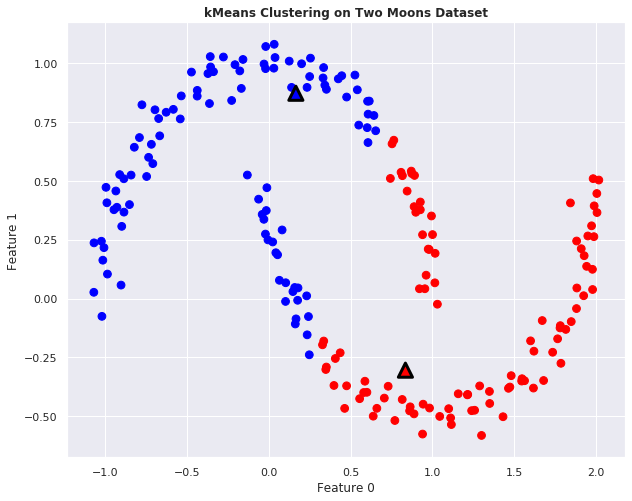

In [23]:
X, y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster data into 2 clusters
y_pred = KMeans(n_clusters=2).fit_predict(X)
cluster_centers = kmeans.cluster_centers_

# plot the clusters
cmap1 = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap=cmap1)
plt.scatter(cluster_centers[1:, 0], cluster_centers[1:, 1], marker='^', 
            linewidth=3, c=['#FF0000','#0000FF'], s=200, edgecolors='black')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('kMeans Clustering on Two Moons Dataset', weight='bold')
plt.show()

* kMeans algorithm fails to discover two halfmoon patterns since it assumes that the distribution of clusters are isotropic - each direction from the centroid is equally important.
* Let's apply kMeans with n_clusters=10 on this dataset.
* Then we have 10 new features and then use linear model for finding the halfmoons.

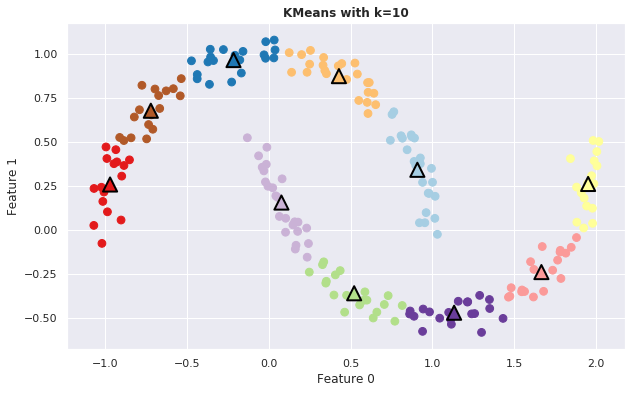

In [24]:
kmeans = KMeans(n_clusters=10).fit(X)
y_pred = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1],c=y_pred, s=60, cmap='Paired')
plt.scatter(centers[:,0], centers[:,1], c=range(kmeans.n_clusters), 
            linewidth=2, s=200, marker='^', cmap='Paired', edgecolor='black')
plt.title('KMeans with k=10', weight='bold')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [25]:
# new distance features
X_new = kmeans.transform(X)
print("Distance features shape: {}".format(X_new.shape))

Distance features shape: (200, 10)


### Compare How Linear models work with new distance features

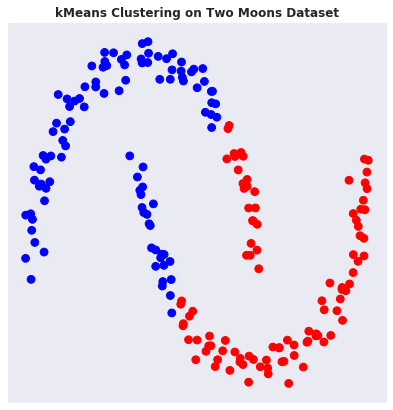

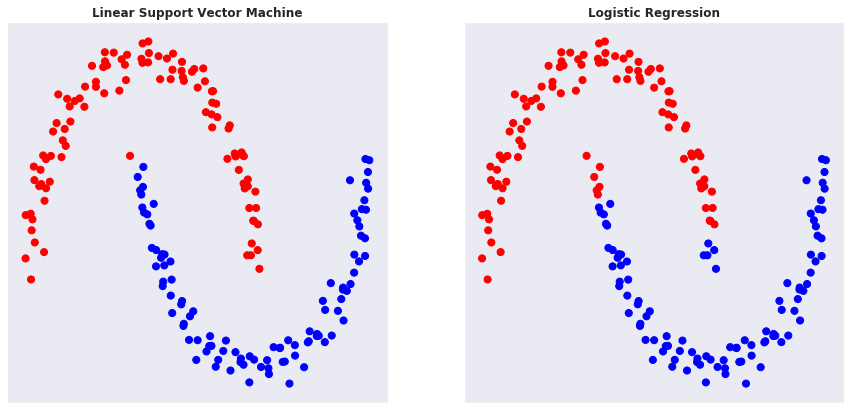

In [26]:
# plotting original KMeans result as well

# cluster data into 2 clusters
y_pred = KMeans(n_clusters=2).fit_predict(X)
cluster_centers = kmeans.cluster_centers_

# plot the clusters
cmap1 = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(6.8, 7))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap=cmap1)
plt.title('kMeans Clustering on Two Moons Dataset', weight='bold')
plt.xticks(ticks=())
plt.yticks(ticks=())
plt.show()

lin_svm = LinearSVC()
logreg = LogisticRegression(solver='liblinear')

models = [lin_svm, logreg]
names= ['Linear Support Vector Machine', 'Logistic Regression']

fix, axes = plt.subplots(1, 2, figsize=(15, 7),
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name, weight='bold')
    model.fit(X_new, y)
    y_pred = model.predict(X_new)
    ax.scatter(X[:,0], X[:,1], c=y_pred, s=50, cmap=cmap1)
plt.show()